# Introduction to Linear Regression

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/)*

Will be using [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html) and [scikit-learn](http://scikit-learn.org/stable/).

Instructions:


*   Questions are marked by the sign ⏩. Provide the answer after the question, either in a code cell or in a text cell (or both).
*   Upload the notebook on the website of the course. Direct emails will be ignored. -- Deadline : one week after the day of the lab.
* Your notebook is an individual work.


In [2]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.15.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)


In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# this allows plots to appear directly in the notebook
%matplotlib inline

## I. The Dataset

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [4]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)

⏩ **1) Use `data.head()` and `data.head(10)`: describe the dataset.**

In [5]:
data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


What are the features?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the response?
- Sales: sales of a single product in a given market (in thousands of widgets)

⏩ **2) Use data.shape. How many examples are contained in the dataset?**

In [6]:
data.shape

(200, 4)

⏩ **3) Use data.describe() and provide your comments.**


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The dataset shows that TV advertising has the highest average spend and widest spread, while sales vary moderately (mean ≈ 14, ranging from 1.6 to 27), suggesting that TV is likely the dominant driver of sales compared to radio and newspaper.

⏩ **4) Use data['Name_column'].hist() to draw the histogram of the sales. Set the parameters in order to plot 20 bins (= bars of the histogram). On the histogram, locate the 25% quantile given by the describe() method of the previous question.**

[]

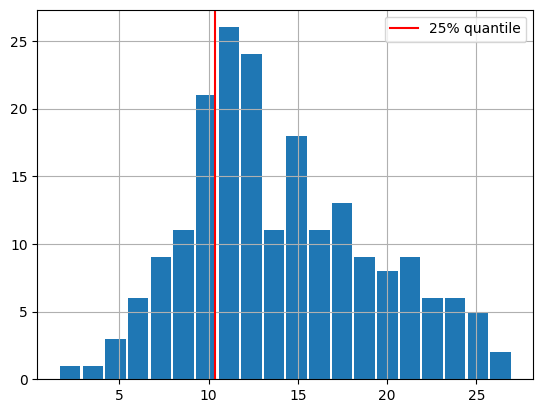

In [82]:
data['Sales'].hist(bins=20, rwidth=0.9)
quantile_25 = data['Sales'].quantile(0.25)
plt.axvline(x = quantile_25, color = 'r', label='25% quantile')
plt.legend()
plt.plot()


The distribution roughly resembles a Gaussian curve, clustering around a central area between 10 and 15 sales.

The curve extends further to the right, which would mean that some advertising campaigns generate more sales than average. This is the expected result.

⏩ **5) Comment the result of data.boxplot(). What is the interest of this plot?**

<Axes: >

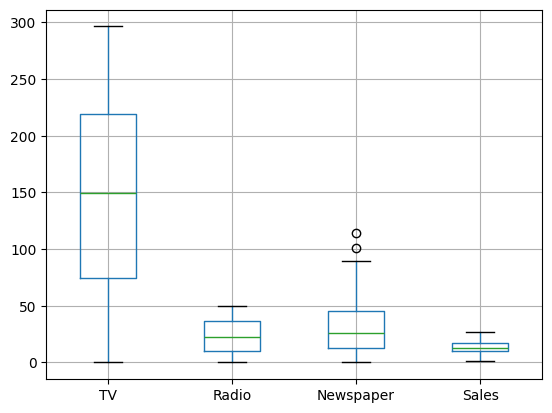

In [12]:
data.boxplot()

Unequal distribution between TV and the other media and high variability for TV ads.

Newspaper; shows some high values, while the majority of expenses are lower.

Here, it would be interesting to observe how TV advertising influences sales.

⏩ **5) Use data.plot(kind='scatter', x=..., y=...) to vizualize the relationship between the features and the response. Comment about the relevance of the use of a linear model.**

<Axes: xlabel='Newspaper', ylabel='Sales'>

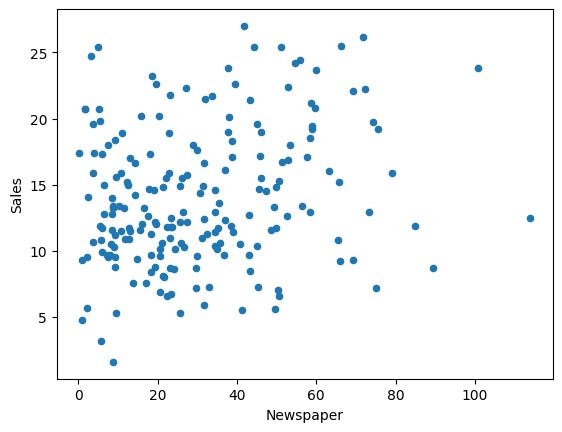

In [16]:
data.plot(kind='scatter',x='Newspaper',y='Sales')

The scatter plot does not show any obvious relationship between newspaper advertising and sales.

A linear regression might not be relevant to describe this model.

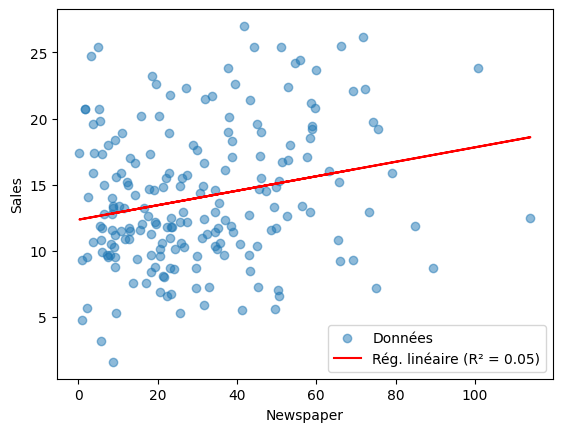

In [ ]:
x = data['Newspaper']
y = data['Sales']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.scatter(x, y, alpha=0.5, label='Données')
plt.plot(x, slope * x + intercept, color='red', label=f'Rég. linéaire (R² = {r_value**2:.2f})')

plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()


⏩ **6) Use data.corr() in order to plot the correlation coefficients.**

**Comment about the coefficient on the diagonal.**

**What feature is the most correlated to the sales?**

**Plot the correlation matrix as a heatmap using sns.heatmap(...,annot=True)**

In [17]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Here we observe the correlations between each feature. What is most interesting here is to compare the correlations between the features and sales. This allows us to see which medium (TV, radio, newspaper) has the strongest influence on sales and we can observe that it is TV.

On the diagonal, we indeed find coefficients equal to 1, since a variable is necessarily correlated with itself.

Note that the matrix is symmetric.

<Axes: >

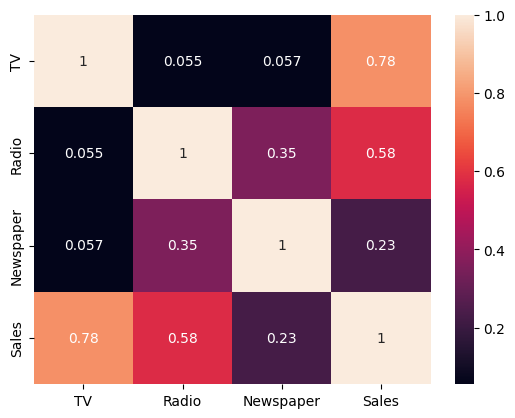

In [18]:
sns.heatmap(data=data.corr(), annot=True)

### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## II. Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):
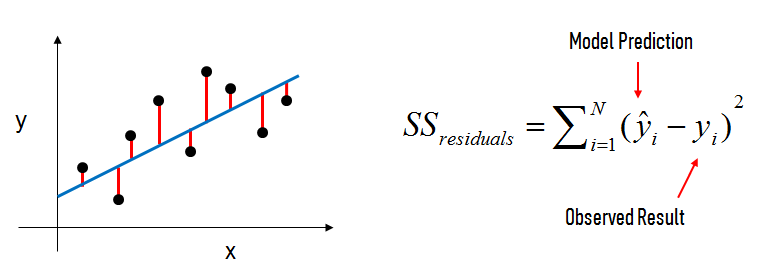

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

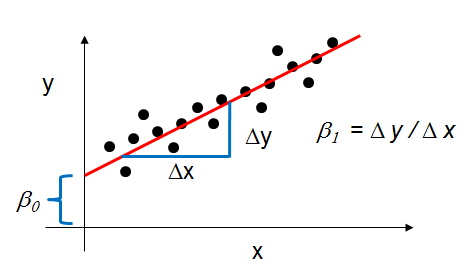





⏩ **7) We are going to do linear regression of the sales with respect to ONE variable amongst 'TV', 'Radio', 'Newspaper'. According to what you have seen from the dataset, which column would you like to keep? Write it down under the form:**

`columns = ['Name of the column you want to keep']`

In [20]:
columns=['TV']

⏩ **8) Run the code below and try to understand it. What are the value of $\beta_0$ and $\beta_1$ of you model?**

In [23]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.7.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.5.2-py3-none-any.whl (308 kB)


In [ ]:
from sklearn.linear_model import LinearRegression
ls = LinearRegression()
ls.fit(data[columns],data['Sales'])
beta0, beta1 = ls.intercept_,ls.coef_[0]
print(f"Beta_0 = {beta0} \nAnd Beta_1 = {beta1}")

Beta_0 = 7.032593549127695 
And Beta_1 = 0.04753664043301975


How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

⏩ **9) Let's say that there was a new market where the spend in the advertising channel you considered was $50,000. What would we predict for the Sales in that market? Make the prediction "by hand" using sums and multiplication of numbers.**

In [28]:
# we use the previsous regression linear found to estimate new sales
ads_tv = 50000
sale = ads_tv*beta1 + beta0
print(f"Predicted sale for {ads_tv}$ invested is {sale}")

Predicted sale for 50000$ invested is 2383.864615200115


⏩ **10) Use sklearn's predict method to recover the above result:**



```
New_data = pd.DataFrame({'Name of your column' : [the value]})
ls.predict(New_data)[0]
```




In [34]:
New_data = pd.DataFrame({'TV' : [ads_tv]})
predicted_sales = ls.predict(New_data)[0]
print(f"For a spend of 50k $ in TV ads, predicted sales are : {predicted_sales}")


For a spend of 50k $ in TV ads, predicted sales are : 2383.864615200115


We do indeed find the same result.

⏩ **11) Using `ls.predict`, generate the predictions $\hat y_i$ for the whole dataset. On the same graph, plot the scattered points $(x_i,y_i)$ and the line passing through the points $(x_i,\hat y_i)$.**

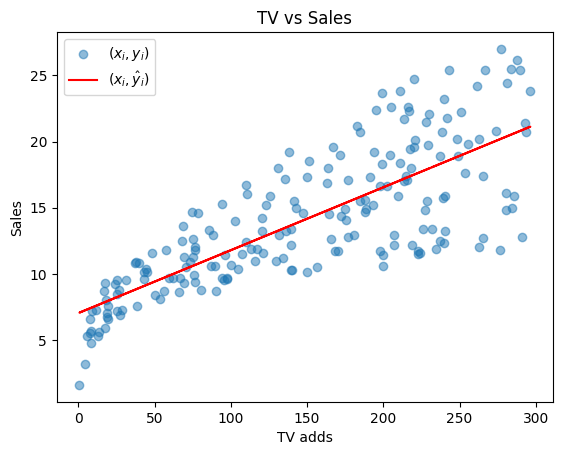

In [40]:
y_pred = ls.predict(data[['TV']])

plt.scatter(data['TV'], data['Sales'], alpha=0.5, label="$(x_i, y_i)$")
plt.plot(data['TV'], y_pred, color='red', label='$(x_i, \hat{y}_i)$')

plt.xlabel('TV adds')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.legend()

plt.show()

**Analyse et limites du modèle linéaire :**

We could calculate the R² coefficient to quantitatively assess the quality of the model, but a visual observation of the scatter plot already reveals some limitations. Indeed:

* **Linearity / Non-linearity:**

  * The scatter plot of TV spending versus Sales does not appear perfectly linear. For low values of TV, the points are close to the regression line, but they progressively deviate from it as TV increases. This suggests a potentially non-linear relationship between TV and Sales.
  * The points near TV = 0 could be excluded from the model for several reasons:

    * They represent a special case where sales can occur without advertising.
    * These points are quite far from the general trend observed for other TV values.

* **Homoscedasticity / Heteroscedasticity ?:**
  The dispersion of the points around the regression line (the "noise") seems to increase with TV values. This indicates heteroscedasticity, since the variance of the residuals does not appear constant.

(Left: homoscedasticity; right: heteroscedasticity)

⏩ **12) Perform a Student t-test**, at level α=0.05, on the significance of the first regression coefficient β1. 

State the null hypothesis, outputted p value and subsequent recommendation of the test. 

Calculate the test statistic by hand, you may use Statsmodels.regression.linear_model.OLS() to verify the result. 

Repeat the question, this time with a one dimensional linear regression for each of the other variables, compare results.

In [42]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 20.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 KB 10.4 MB/s eta 0:00:00


* Null hypothesis:


$$
H_0: \beta_1 = 0 
$$
No linear relationship

* Alternative hypothesis:

$$
H_1: \beta_1 \neq 0
$$
Reject H0 ie ${\beta _1}$ is statistically significant.

**Test statistic**

$$
t = \frac{\hat{\beta}_1}{SE(\hat{\beta}_1)}
$$

* $\hat{\beta}_1$ = estimated coefficient for TV / Radio...
* $SE(\hat{\beta}_1)$ = standard error of ${\beta _1}$.

**REMIND**

$$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$$

$$
\hat{\beta}_1 = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}
$$

The variance is

$$
\operatorname{Var}(\hat{\beta}_1) = \frac{\sigma^2}{\sum_i (x_i - \bar{x})^2}
$$

where $\sigma^2$ is the variance of the error term.

Since $\sigma^2$ is unknown, we need an estimation :

$$
\hat{\sigma}^2 = \frac{\sum_i (y_i - \hat{y}_i)^2}{n - 2}
$$

$$
SE(\hat{\beta}_1) = \sqrt{ \frac{\hat{\sigma}^2}{\sum_i (x_i - \bar{x})^2} }
$$


### For TV (hand-made)

In [48]:
x = data['TV']
y = data['Sales']
n = len(x)

# slope
beta1 = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)
beta0 = y.mean() - beta1 * x.mean()

# fitted values and residuals
y_hat = beta0 + beta1 * x
residuals = y - y_hat

# estimate variance of residuals
sigma2_hat = np.sum(residuals**2) / (n - 2)

# standard error of beta1
se_beta1 = np.sqrt(sigma2_hat / np.sum((x - x.mean())**2))

print("beta1:", beta1)
print("SE(beta1):", se_beta1)

beta1: 0.047536640433019736
SE(beta1): 0.0026906071877968707


In [49]:
# t-stat
t_stat = beta1/se_beta1
print("t-stat :", t_stat)

t-stat : 17.66762560087554


In [46]:
import statsmodels.api as sm

# for TV
X_tv = sm.add_constant(data['TV'])
y = data['Sales']

model_tv = sm.OLS(y, X_tv).fit()
print(model_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           1.47e-42
Time:                        15:39:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

We do find the same result with OLS :
```
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
```

### For all features and test hypothesis

In [55]:
import statsmodels.api as sm

def t_test(X, y, alpha=0.05):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    beta1 = model.params.iloc[1]
    se_beta1 = model.bse.iloc[1] # std error
    t_stat = model.tvalues.iloc[1] # t stat
    p_value = model.pvalues.iloc[1]# p-value

    # decision
    if p_value < alpha:
        decision = "Reject H0: beta1 is statistically significant."
    else:
        decision = "Fail to reject H0"

    return {
        "Beta1": beta1,
        "Standard Error": se_beta1,
        "t-statistic": t_stat,
        "p-value": p_value,
        "Decision": decision
    }


predictors = ['TV', 'Radio', 'Newspaper']
results = {}

for predictor in predictors:
    results[predictor] = t_test(data[[predictor]], data['Sales'])
    print(f"\n--- Results for {predictor} ---")
    for key, value in results[predictor].items():
        print(f"{key}: {value}")


--- Results for TV ---
Beta1: 0.047536640433019764
Standard Error: 0.0026906071877968716
t-statistic: 17.667625600875546
p-value: 1.467389700194655e-42
Decision: Reject H0: beta1 is statistically significant.

--- Results for Radio ---
Beta1: 0.20249578339243982
Standard Error: 0.02041130636009063
t-statistic: 9.920765472824968
p-value: 4.354966001766538e-19
Decision: Reject H0: beta1 is statistically significant.

--- Results for Newspaper ---
Beta1: 0.05469309847227315
Standard Error: 0.016575721876358165
t-statistic: 3.2995907436334058
p-value: 0.0011481958688882544
Decision: Reject H0: beta1 is statistically significant.


For TV, radio, and even newspapers, H0 is rejected. This means that, taken individually, each of these advertising media is positively related to sales.

We can add that there is a stronger relation for TV and radio regarding p-value.

⏩ **13) Provide confidence intervals of level $\alpha = 0.05$, around $\hat\beta_0 + \hat\beta_1 x$ for both $\beta_0 + \beta_1 x$ and $Y$, the latter being known as a prediction interval.** 

Let $x$ vary from the minimum to maximum value obtained by the independent variable in the training set. Compare the two intervals, highlighting which is wider and how their width changes, suggest reasons for this.

## Confidence intervals and Prediction intervals

Given $\hat{y}(x) = \hat{\beta}_0 + \hat{\beta}_1 x$.

* $\hat{\sigma} ^2 = \dfrac{1}{n-d-1}\sum (y_i - \hat{y}_i)^2 = \dfrac{1}{n-2}\sum (y_i - \hat{y}_i)^2 $
* $SS_{x} = \sum (x_i - \bar{x})^2$,
* $t_{\alpha/2}^{n-2}$ : quantile of the Student’s $t$ distribution with $n-2$ degrees of freedom.

1. **Confidence interval for the mean $E[Y|x]$**

$$
\hat{\beta}_0 + \hat{\beta}_1 x \pm t_{\alpha/2}^{n-2} \cdot \hat{\sigma} \cdot \sqrt{\frac{1}{n} + \frac{(x-\bar{x})^2}{S_{xx}}}
$$

2. **Prediction interval for a new observation $Y$**

$$
\hat{\beta}_0 + \hat{\beta}_1 x \pm t_{\alpha/2}^{n-2} \cdot \hat{\sigma} \cdot \sqrt{1 + \frac{1}{n} + \frac{(x-\bar{x})^2}{S_{xx}}}
$$



In [56]:
import scipy.stats as st

def manual_intervals(X, y, x_new, alpha=0.05):
    n = len(X)
    X_design = sm.add_constant(X)
    model = sm.OLS(y, X_design).fit()

    beta0, beta1 = model.params
    y_hat = beta0 + beta1 * x_new

    residuals = y - model.predict(X_design)
    s2 = np.sum(residuals**2) / (n - 2)
    s = np.sqrt(s2)

    x_bar = X.mean()
    Sxx = np.sum((X - x_bar)**2)

    t_val = st.t.ppf(1 - alpha/2, df=n-2)

    # standard errors
    se_mean = s * np.sqrt(1/n + (x_new - x_bar)**2 / Sxx)
    se_pred = s * np.sqrt(1 + 1/n + (x_new - x_bar)**2 / Sxx)

    # intervals
    ci_mean = (y_hat - t_val*se_mean, y_hat + t_val*se_mean)
    pi_pred = (y_hat - t_val*se_pred, y_hat + t_val*se_pred)

    return {"y_hat": y_hat, "CI_mean": ci_mean, "PI_pred": pi_pred}


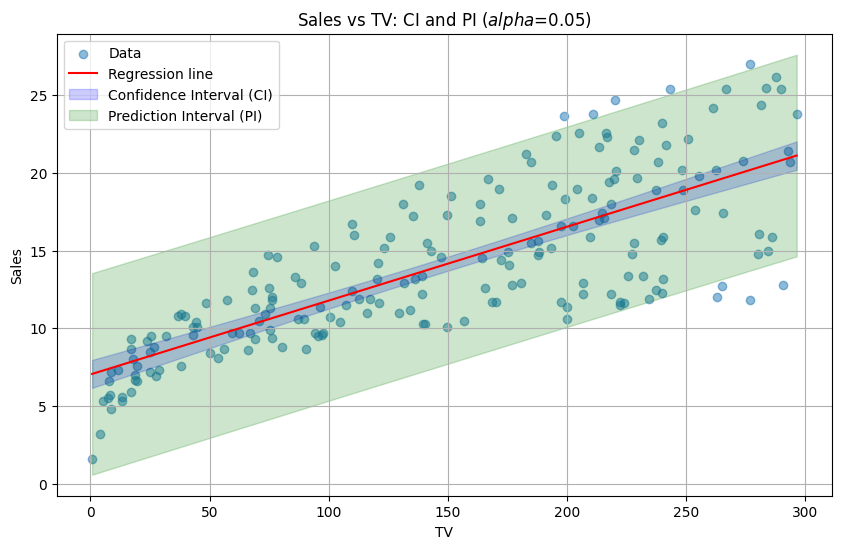

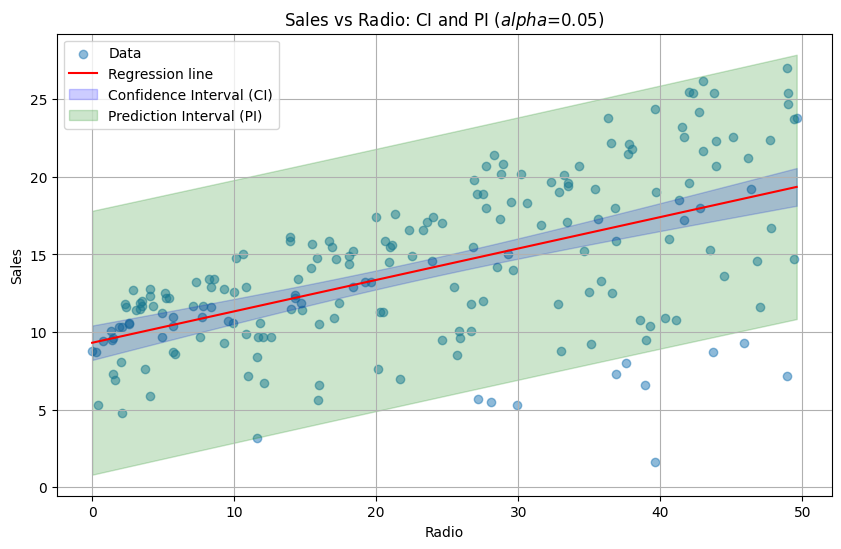

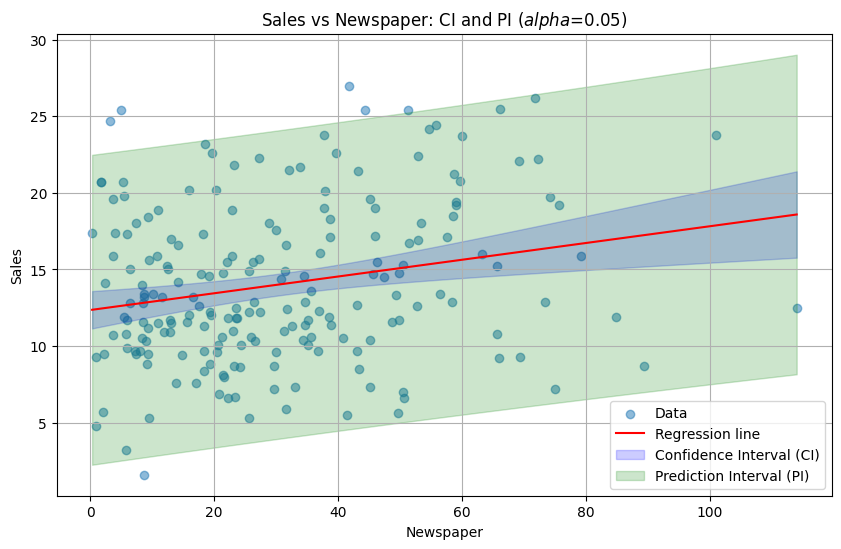

In [ ]:
def plot_IC_IP(predictor, alpha=0.05, n_points=100):
    x = data[predictor]
    y = data["Sales"]
    x_range = np.linspace(x.min(), x.max(), n_points)
    ci_lower = np.zeros(n_points)
    ci_upper = np.zeros(n_points)
    pi_lower = np.zeros(n_points)
    pi_upper = np.zeros(n_points)
    y_hat = np.zeros(n_points)

    for i, x_val in enumerate(x_range):
        result = manual_intervals(x, y, x_val, alpha)
        y_hat[i] = result["y_hat"]
        ci_lower[i], ci_upper[i] = result["CI_mean"]
        pi_lower[i], pi_upper[i] = result["PI_pred"]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5, label="Data")
    plt.plot(x_range, y_hat, color="red", label="Regression line")
    plt.fill_between(x_range, ci_lower, ci_upper, color="blue", alpha=0.2, label="Confidence Interval (CI)")
    plt.fill_between(x_range, pi_lower, pi_upper, color="green", alpha=0.2, label="Prediction Interval (PI)")
    plt.xlabel(predictor)
    plt.ylabel("Sales")
    plt.title(f'Sales vs {predictor}: CI and PI ($alpha$={alpha})')
    plt.legend()
    plt.grid(True)
    plt.show()

    return {"x_range": x_range, "y_hat": y_hat, "CI": (ci_lower, ci_upper), "PI": (pi_lower, pi_upper)}

# Example loop for all three predictors:
predictors = ['TV', 'Radio', 'Newspaper']
results = {}
for pred in predictors:
    results[pred] = plot_IC_IP(pred)



In [ ]:
for pred in predictors:
    ci_lower, ci_upper = results[pred]["CI"]
    pi_lower, pi_upper = results[pred]["PI"]
    print(f"--- {pred} ---")
    print(f"Confidence Interval at x_min: ({ci_lower[0]:.2f}, {ci_upper[0]:.2f})")
    print(f"Confidence Interval at x_max: ({ci_lower[-1]:.2f}, {ci_upper[-1]:.2f})")
    print(f"Prediction Interval at x_min: ({pi_lower[0]:.2f}, {pi_upper[0]:.2f})")
    print(f"Prediction Interval at x_max: ({pi_lower[-1]:.2f}, {pi_upper[-1]:.2f})")

--- TV ---
Confidence Interval at x_min: (6.17, 7.97)
Confidence Interval at x_max: (20.21, 22.04)
Prediction Interval at x_min: (0.58, 13.55)
Prediction Interval at x_max: (14.63, 27.61)
--- Radio ---
Confidence Interval at x_min: (8.20, 10.42)
Confidence Interval at x_max: (18.14, 20.57)
Prediction Interval at x_min: (0.81, 17.81)
Prediction Interval at x_max: (10.84, 27.87)
--- Newspaper ---
Confidence Interval at x_min: (11.15, 13.59)
Confidence Interval at x_max: (15.77, 21.40)
Prediction Interval at x_min: (2.25, 22.48)
Prediction Interval at x_max: (8.16, 29.02)


⏩ **14) Write your comments. How happy are you with the model?**

In general, 
- the confidence interval (CI) is more satisfactory than the prediction interval (PI). 
- The model is not very reliable for Newspaper. We had already observed this with the p-value, but we can now confirm it with the graphs, as the intervals are very wide.
- As mentioned earlier in question 11, there are avenues for improvement concerning the model and the data. The relationship between TV and Sales appears to be non-linear, with increasing heteroscedasticity. Additionally, the data points near TV = 0 represent atypical cases that are less relevant and may bias the model.

| Feature    | Quality of Confidence Interval  |  Quality of Prediction Interval |
|------------|---------------------------|-------------------------------|
| **TV**     | Good                    | Medium / Low               |
| **Radio**  | Good                    | Low                        |
| **Newspaper** | Medium / Low           | Very Low                 |


<img src="https://media3.giphy.com/media/7zLhR58ckkJtbmqmN2/giphy.gif" width="300">


## III. Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

⏩ **15) Include all the three columns in the model and re-train a least-square estimator using scikit-learn. Provide the values of the coefficients $\beta_i$.**

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']] 
y = data['Sales']

model = ls.fit(X,y)
beta_0 = model.intercept_
beta_1, beta_2, beta_3 = model.coef_

# Print the coefficients
print(f"beta_0: {beta_0:.4f}")
print(f"Beta 1 (TV): {beta_1:.4f}")
print(f"Beta 2 (Radio): {beta_2:.4f}")
print(f"Beta 3 (Newsletter): {beta_3:.4f}")

beta_0: 2.9389
Beta 1 (TV): 0.0458
Beta 1 (Radio): 0.1885
Beta 1 (Newsletter): -0.0010


⏩ **16) For a given amount of Radio and Newspaper ad spending, how much is the increase of sells resulting from a $1000 increase in TV ad spending?**

In [70]:
Delta_sales = beta_1 * 1000

print(f"Increase in Sales for a $1000 increase in TV spending: {Delta_sales:.2f}")


Increase in Sales for a $1000 increase in TV spending: 45.76


### Linear Gaussian model and confidence intervals

Our aim is now to compute confidence intervals on each of the coefficients $\beta_i$ at the level 95%. A way to think of a confidence interval is the following: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient. Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

To that end, we make the assumption that the model is homoscedastic, which means linear, Gaussian, and with a constant variance $\sigma^2$:
$$
Y \sim {\mathcal N}(\Phi \beta,\sigma^2 I_N)
$$
where $N$ is the number of sambles, $d=3$ is the number of regressors, $\Phi$ is the $N\times (d+1)$ design matrix containing the values of the regressors (TV, Radio, Newspaper), $\beta=(\beta_0,\dots,\beta_d)^T$ and $\sigma^2$ are the unknown parameters, and $I_N$ is the $N\times N$ identity matrix.

A 95% confidence interval on $\beta_k$ is given by:
$$
\hat\beta_k \pm q \sqrt{\frac {\hat\sigma^2 s_k}N}
$$
where $s_k$ is the k th coefficient of the diagonal of $(\Phi^T\Phi)^{-1}$, $\hat \sigma^2$ is the estimated variance of the residuals, given by:
$$
\hat \sigma^2 = \frac{\|Y-\hat Y\|^2}{N-d-1}
$$

⏩ **17) What is $q$ in the above formula?**

q is the quantile of the Student’s t-distribution corresponding to a 95% confidence level.

⏩ **18) Draw the histogram of the residuals $e_i=\hat y_i-y_i$, using 20 bins.**

**Without calculating it numerically, what is APPROXIMATELY the mean and the standard deviation?**

**Does it make sense to assume that the residuals are Gaussian?**

[]

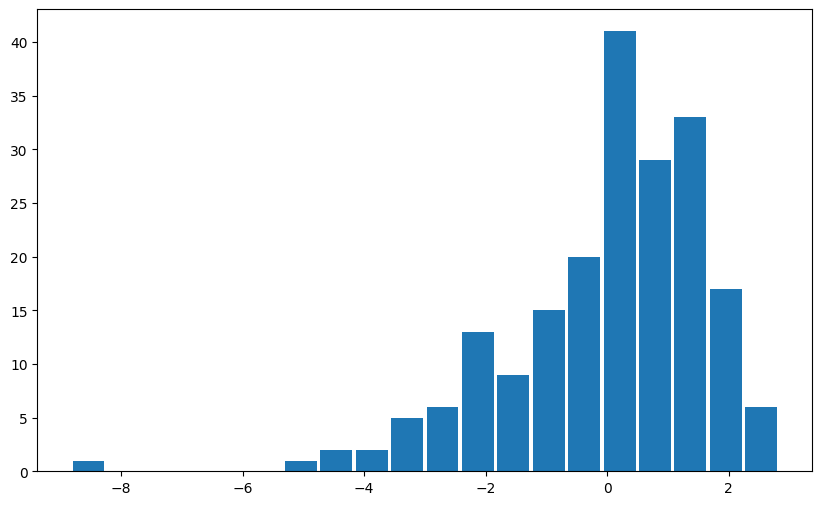

In [81]:
y_pred = model.predict(X)

residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, rwidth=0.9)
plt.plot()


Approximate Mean of Residuals: $\text{Mean} \approx 0$

Given that most residuals are concentrated between -1 and 3, the standard deviation is likely closer to 1.5.

The following function computes confidence intervals. The syntax is as follows:


```
confidence_interval(X,y,a,k)
```

where `X` is a $N\times d$ pandas dataframe corresponding to the design matrix, `y` is a pandas series corresponding to the labels, $a$ is the confidence level between 0 and 1 (typically set to 0.95), and $k\in\{0,1,\dots,d\}$ represents the variable you would like to consider.

⏩ **19) Compute the confidence intervals for the 3 variables.**

In [96]:
def confidence_interval(X,y,a,k):
  assert(a<1)
  (N,d) = X.shape
  lsf = LinearRegression()
  lsf.fit(X,y)
  variance = np.linalg.norm(y.values-lsf.predict(X))**2/(N-d-1)
  Phi = np.concatenate((np.reshape(np.ones(N),(N,1)),X.to_numpy()),axis=1)
  s = np.diag(np.linalg.inv(np.dot(Phi.T,Phi)))[k]
  q = stats.t(df=N-d-1).ppf(1-(1-a)/2)
  return (lsf.coef_[k-1]-q*np.sqrt(variance*s/N),lsf.coef_[k-1]+q*np.sqrt(variance*s/N))

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
confidence_level = 0.95
a = 1 - confidence_level
for k in range(1,4):  
    ci = confidence_interval(X, y, a, k=k)    
    print(f"beta_{k}: {ci}")


beta_1: (np.float64(0.045570125082648495), np.float64(0.04595916582814671))
beta_2: (np.float64(0.1873291679143402), np.float64(0.18973086592206875))
beta_3: (np.float64(-0.001856213810388536), np.float64(-0.000218772274564121))


The confidence intervals seem very narrow, which means that the effect of TV (for e.g) on Sales is estimated very precisely. This might suggest an error, especially for Newspaper. The estimation might be too precise.

A negative coefficient for Newspaper advertising suggests that increased spending on Newspaper ads is associated with a decrease in sales, which might not make practical sense.

⏩ **20) Compute confidence intervals at 99%. Based on this result, if you wanted to eliminate one feature from the model, which one would it be? Explain.**

In [101]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
confidence_level = 0.99
a = 1 - confidence_level
for k in range(1,4):  
    ci = confidence_interval(X, y, a, k=k)    
    print(f"beta_{k}: {ci}")


beta_1: (np.float64(0.04576340764985524), np.float64(0.045765883260939964))
beta_2: (np.float64(0.18852237546897466), np.float64(0.1885376583674343))
beta_3: (np.float64(-0.0010427028674928483), np.float64(-0.0010322832174598086))


We obtain almost identical results up to $10^{-4}$, whether for the 95% confidence intervals or the 99% confidence intervals. The estimates of the coefficients seems very precise

## IV. Model selection by cross-validation

Consider we seek to choose between two models:


*   The first one includes all the columns `TV`, `Radio`, `Newspaper`
*   The second one includes only `TV` and `Radio`

Which one should one choose?

**Cross-validation.** provides a reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

⏩ **21) Use sklearn `train_test_split` method to spli the data into a train and a test set (see the doc [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). Then, fit two linear regressors on the train set only: one using all features, the other using only `TV` and`Radio`.**

### Prepare data

In [115]:
from sklearn.model_selection import train_test_split

X = data[['TV', 'Radio', 'Newspaper']]  
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### All features (TV + Radio + Newspaper)

In [116]:
model_all = LinearRegression()
model_all.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### TV + Radio Only

In [117]:
# model tv radio
X_train_tv_radio = X_train[['TV', 'Radio']]
X_test_tv_radio = X_test[['TV', 'Radio']]

model_tv_radio = LinearRegression()
model_tv_radio.fit(X_train_tv_radio, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


⏩ **22) Use sklearn `mean_squared_error` (doc [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)) to compare the mean squared error of both models, on the test set.**

In [118]:
from sklearn.metrics import mean_squared_error

y_pred_all = model_all.predict(X_test)
y_pred_tv_radio = model_tv_radio.predict(X_test_tv_radio)

mse_all = mean_squared_error(y_test, y_pred_all)
mse_tv_radio = mean_squared_error(y_test, y_pred_tv_radio)

print("MSE all :", mse_all)
print("MSE TV + Radio only :", mse_tv_radio)


MSE all : 1.542445468975137
MSE TV + Radio only : 1.5440849318686731


The MSE of the model with only TV and Radio is slightly lower than that of the model with TV, Radio, and Newspaper.

This suggests that adding the Newspaper variable degrade model's performance. This is the expected result following the previous remark.

⏩ **23) Observe that the mean square error vary, when you re-run the cells corresponding to Questions 21 and 22. How do you explain this?**


By default, random_state is set to None in train_test_split, causing the function to randomly select the train and test sets each time. To fix this issue, we can set the random_state argument.

⏩ **24) Between the two models, which one would you recommend? Justify.**

Based on the MSE, the reduced model considering only TV and Radio is slightly better. (cf Q22)

⏩ **25) To choose between two models, your method seems to depend on the ratio of the test set versus the train set. Can you see a more rigorous method allowing to cross-validate the model?**

In [ ]:
from sklearn.model_selection import cross_val_score


scores_all = cross_val_score(model_all, data[['TV', 'Radio', 'Newspaper']]  , y, cv=5, scoring='neg_mean_squared_error')
scores_tv_radio = cross_val_score(model_tv_radio, data[['TV', 'Radio']], y, cv=5, scoring='neg_mean_squared_error')

print("Cross validation all :", scores_all)
print("Cross validation TV + Radio only :", scores_tv_radio)

mean_all = np.mean(np.abs(scores_all))
mean_tv_radio = np.mean(np.abs(scores_tv_radio))

print("mean all :", mean_all)
print("mean tv + radio :", mean_tv_radio)


Cross validation all : [-3.1365399  -2.42566776 -1.58522508 -5.42615506 -2.79114519]
Cross validation TV + Radio only : [-3.07164335 -2.41053755 -1.5737634  -5.20917023 -2.79308892]
mean all : 3.0729465971002106
mean tv + radio : 3.011640691152608


The model TV + Radio only has a slightly lower mean MSE compared to the model with all features.

This suggests that the model without Newspapers features performs slightly better.

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.